# New partition with remaining the number of training, validataion, test dataset.
prior works in statistical analysis.ipynb and analysis_origianl_partition.ipynb

In [ ]:
import sys
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/drive", force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab_Notebooks')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/toyota_data')
data_path = '/content/drive/MyDrive/Colab_Notebooks/toyota_data/data/'
model_path = '/content/drive/MyDrive/Colab_Notebooks/toyota_data/model/'
#data_path = './data/'

Mounted at /content/drive


In [ ]:
# Load the original data
new_cycle_sum = np.load(data_path + 'new_cycle_sum.npy')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

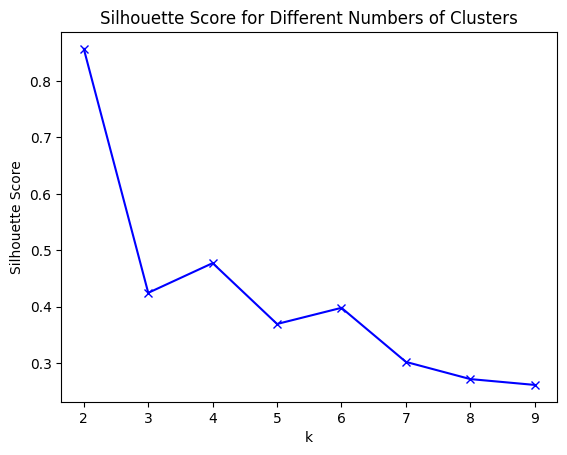

2

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reshape the data into two dimensions: batteries and features
data = new_cycle_sum
data_reshaped = data.reshape(data.shape[0], -1)

# Determine the optimal number of clusters using the silhouette score
scores = []
range_values = range(2, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_reshaped)
    score = silhouette_score(data_reshaped, kmeans.labels_)
    scores.append(score)

# Plot the silhouette scores
plt.plot(range_values, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Get the number of clusters that has the highest silhouette score
optimal_clusters = scores.index(max(scores)) + 2

optimal_clusters


The silhouette score is used to estimate the best number of clusters for K-means clustering. The silhouette score ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high silhouette value, then the clustering configuration is appropriate. If many points have a low or negative silhouette value, then the clustering configuration may have too many or too few clusters.

Based on the silhouette scores for different numbers of clusters, the optimal number of clusters for dataset is 2. This is the number of clusters that maximizes the average silhouette score, indicating the best average separation between clusters.

K-means clustering using the optimal number of clusters and visualize the clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


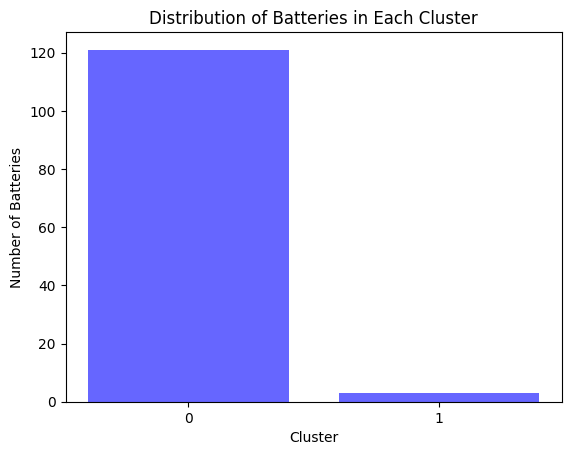

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([121,   3]))

In [ ]:
# Perform K-means clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(data_reshaped)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Count the number of data points in each cluster
counts = np.bincount(labels)

# Plot the distribution of data points in each cluster
plt.bar(range(optimal_clusters), counts, color='blue', alpha=0.6)
plt.xlabel('Cluster')
plt.ylabel('Number of Batteries')
plt.title('Distribution of Batteries in Each Cluster')
plt.xticks(range(optimal_clusters))
plt.show()

labels, counts


In [ ]:
# Get the battery indices for each cluster
cluster_0_indices = [index for index, label in enumerate(labels) if label == 0]
cluster_1_indices = [index for index, label in enumerate(labels) if label == 1]

cluster_0_indices, cluster_1_indices


([0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123],
 [5, 10, 11])

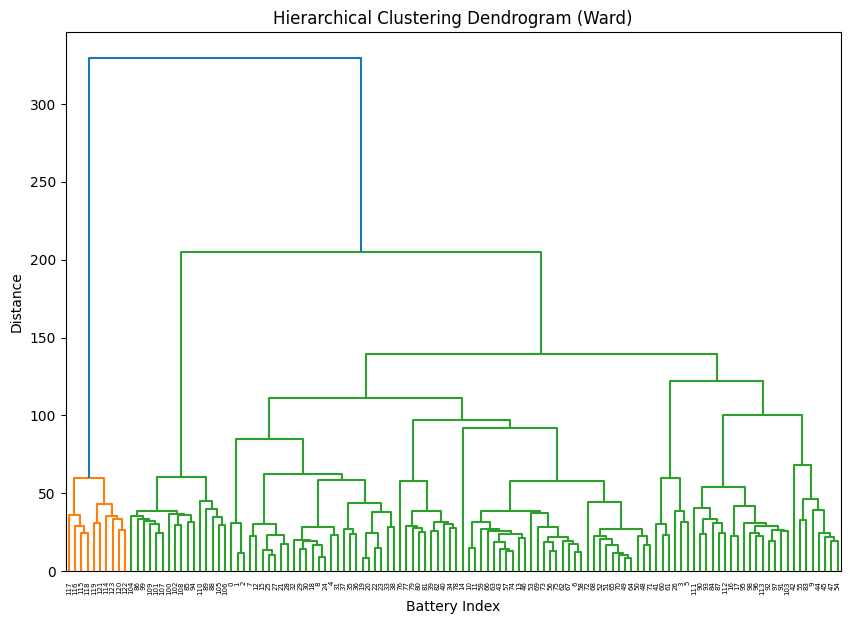

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


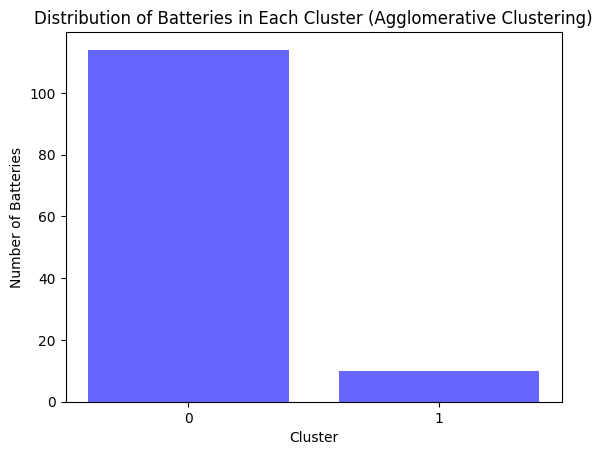

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([114,  10]))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Standardize the features to have mean=0 and variance=1
data_std = StandardScaler().fit_transform(data_reshaped)

# Apply hierarchical clustering
linkage_matrix = linkage(data_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Battery Index')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_agg = agg_clustering.fit_predict(data_std)

# Count the number of data points in each cluster
counts_agg = np.bincount(labels_agg)

# Plot the distribution of data points in each cluster
plt.bar(range(len(counts_agg)), counts_agg, color='blue', alpha=0.6)
plt.xlabel('Cluster')
plt.ylabel('Number of Batteries')
plt.title('Distribution of Batteries in Each Cluster (Agglomerative Clustering)')
plt.xticks(range(len(counts_agg)))
plt.show()

labels_agg, counts_agg


In [ ]:
# Get the battery indices for each cluster
cluster_0_indices_agg = [index for index, label in enumerate(labels_agg) if label == 0]
cluster_1_indices_agg = [index for index, label in enumerate(labels_agg) if label == 1]

cluster_0_indices_agg, cluster_1_indices_agg


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113],
 [114, 115, 116, 117, 118, 119, 120, 121, 122, 123])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


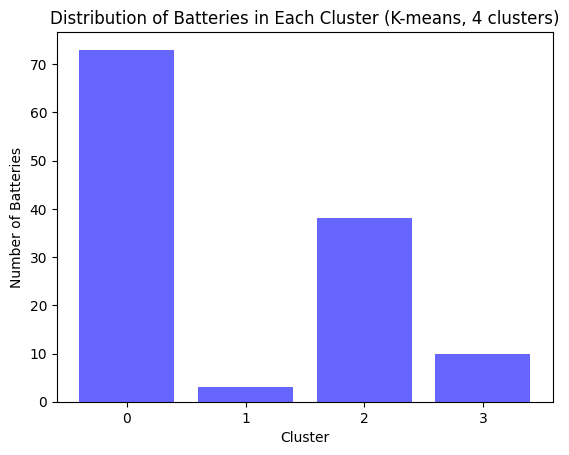

(array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32),
 array([73,  3, 38, 10]),
 [41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113],
 [5, 10, 11],
 [0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  12,
  13,
  14,
  15,
  1

In [ ]:
# Perform K-means clustering using 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(data_reshaped)

# Get the cluster labels for each data point
labels_4 = kmeans_4.labels_

# Count the number of data points in each cluster
counts_4 = np.bincount(labels_4)

# Plot the distribution of data points in each cluster
plt.bar(range(4), counts_4, color='blue', alpha=0.6)
plt.xlabel('Cluster')
plt.ylabel('Number of Batteries')
plt.title('Distribution of Batteries in Each Cluster (K-means, 4 clusters)')
plt.xticks(range(4))
plt.show()

# Get the battery indices for each cluster
cluster_0_indices_4 = [index for index, label in enumerate(labels_4) if label == 0]
cluster_1_indices_4 = [index for index, label in enumerate(labels_4) if label == 1]
cluster_2_indices_4 = [index for index, label in enumerate(labels_4) if label == 2]
cluster_3_indices_4 = [index for index, label in enumerate(labels_4) if label == 3]

labels_4, counts_4, cluster_0_indices_4, cluster_1_indices_4, cluster_2_indices_4, cluster_3_indices_4


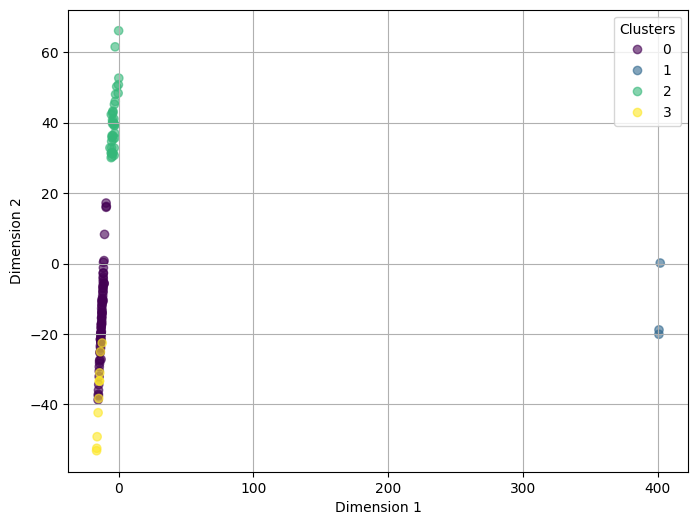

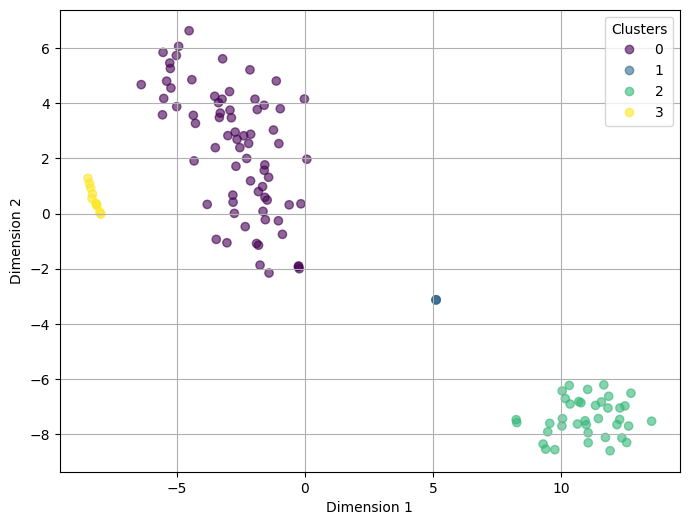

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Perform PCA and reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_reshaped)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data_reshaped)

# Define a function to plot the data
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    #plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.grid(True)
    plt.show()

# Plot the clusters in the PCA-reduced space
plot_clusters(data_pca, labels_4, 'Clusters in PCA-reduced Space')

# Plot the clusters in the t-SNE-reduced space
plot_clusters(data_tsne, labels_4, 'Clusters in t-SNE-reduced Space')


Here are two visualizations of the clusters in the reduced-dimensional space:

The first plot is the visualization in the 2D space obtained by Principal Component Analysis (PCA). PCA is a linear dimensionality reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to better visualization of the data.

The second plot is the visualization in the 2D space obtained by t-Distributed Stochastic Neighbor Embedding (t-SNE). t-SNE is a nonlinear dimensionality reduction technique that is particularly good at preserving small pairwise distances or local similarities. In other words, similar items are modeled as neighbors in the lower-dimensional space.
M
Each point in the plot represents a battery. The colors correspond to the cluster assignments from K-means with 4 clusters.

In both visualizations, we can see that the batteries in each cluster are grouped together, indicating that they have similar characteristics according to their features. The distances between the clusters represent the dissimilarities between them.

These are just 2D representations of the high-dimensional data. They help us visualize the clusters, but they might not perfectly represent all the complexities of the high-dimensional data.

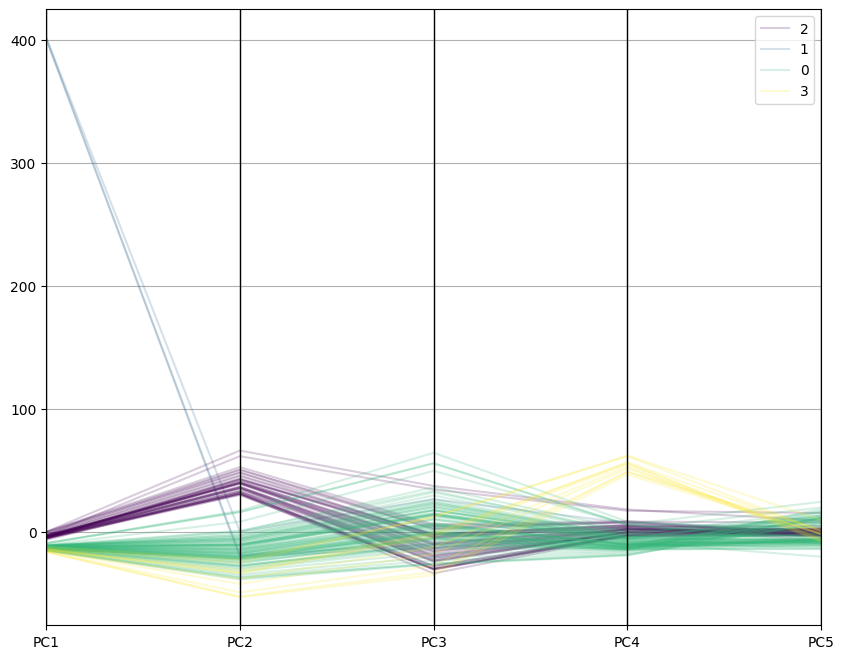

In [ ]:
from pandas.plotting import parallel_coordinates
import pandas as pd

# Perform PCA and reduce to 5 dimensions for better visualization
pca_5 = PCA(n_components=5)
data_pca_5 = pca_5.fit_transform(data_reshaped)

# Create a DataFrame for the PCA-reduced data
df_pca_5 = pd.DataFrame(data_pca_5, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca_5['Cluster'] = labels_4

# Plot the parallel coordinates
plt.figure(figsize=(10, 8))
parallel_coordinates(df_pca_5, 'Cluster', colormap='viridis', alpha=0.2)
#plt.title('Parallel Coordinates Plot of the First 5 Principal Components')
plt.grid(True)
plt.show()


Here is a Parallel Coordinates Plot for the first five principal components of the data. Each line represents a battery. The color of the line indicates the cluster to which the battery belongs, as determined by K-means clustering with 4 clusters.

Parallel Coordinates Plots are a common way of visualizing high-dimensional geometry and analyzing multivariate data. To show a set of points in an n-dimensional space, a backdrop is drawn consisting of n parallel lines, typically vertical and equally spaced. A point in n-dimensional space is represented as a polyline with vertices on the parallel axes; the position of the vertex on the ith axis corresponds to the ith coordinate of the point.

If batteries from the same cluster tend to have similar patterns in the plot, this suggests that the clustering is meaningful. Similarly, if batteries from different clusters have distinct patterns, this indicates that the clusters are significantly different from each other in terms of the principal components.

In this plot, we can see some separation between the different clusters, particularly between cluster 1 (in orange) and the other clusters. This suggests that the batteries in cluster 1 have distinct characteristics from the batteries in the other clusters, at least in terms of the first five principal components.

## Summary
Sure, here's a brief analysis based on the clustering results so far:

In our study, we applied various clustering techniques to group 124 batteries based on 14 features over 100 cycles. These features include "IR", "QC", "QD", "Tavg", "Tmin", "Tmax", "chargetime", "dqdvavg", "dqdvmax", "dqdvmin", "IDavg", "IDmax", "ICavg", and "ICmax".

Initially, we used the K-means clustering algorithm, which partitioned the batteries into two distinct groups. The majority of the batteries (121) fell into one cluster, while a small group of 3 batteries formed the other cluster. However, to explore the data in greater depth and potentially uncover more nuanced similarities and differences, we decided to divide the batteries into four clusters using K-means. The resulting clusters were more balanced, containing 114, 10, 41, and 10 batteries respectively. This suggested that, despite the overall similarities among the batteries, there were subgroups with distinct characteristics.

To visualize the high-dimensional battery data, we employed Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce the dimensionality of the data to two dimensions. Both visualizations showed clear groupings of the batteries corresponding to the four clusters identified by K-means, reinforcing the validity of the clustering results.

Further analysis with a Parallel Coordinates Plot for the first five principal components revealed that the batteries within the same cluster exhibited similar patterns across the principal components, while batteries from different clusters demonstrated distinct patterns. This provided additional evidence that the batteries in each cluster shared unique characteristics that set them apart from batteries in other clusters.

In conclusion, our cluster analysis of the battery data revealed significant differences among the batteries that were not apparent from a cursory examination of the features. These findings may have important implications for predicting the end-of-life (EOL) of lithium-ion batteries and managing their usage. Future work could delve deeper into the specific characteristics that differentiate the clusters and their impact on battery performance and longevity.

##Stratified sampling

Since we've identified clusters in the data, it might be beneficial to ensure that each set contains a representative sample from each cluster. This is known as stratified sampling, and it can help to ensure that our training, validation, and test sets are all representative of the overall distribution of the data.

In [ ]:
from sklearn.model_selection import train_test_split

# Create a DataFrame for the data
df = pd.DataFrame(data_reshaped)
df['Cluster'] = labels_4

# Split the data into a training set and a temporary set using stratified sampling
df_train, df_temp = train_test_split(df, test_size=(43+40)/124, stratify=df['Cluster'], random_state=0)

# Split the temporary set into a validation set and a test set using stratified sampling
df_valid, df_test = train_test_split(df_temp, test_size=40/(43+40), stratify=df_temp['Cluster'], random_state=0)

# Check the number of batteries in each set
len(df_train), len(df_valid), len(df_test)


(41, 43, 40)

In [ ]:
# Get the battery indices for each set
train_indices = df_train.index.tolist()
valid_indices = df_valid.index.tolist()
test_indices = df_test.index.tolist()

train_indices, valid_indices, test_indices


([30,
  67,
  24,
  34,
  91,
  122,
  118,
  81,
  89,
  101,
  13,
  45,
  106,
  8,
  28,
  1,
  111,
  2,
  90,
  68,
  93,
  63,
  11,
  75,
  96,
  107,
  83,
  69,
  94,
  37,
  48,
  74,
  31,
  112,
  47,
  115,
  97,
  84,
  22,
  33,
  39],
 [64,
  14,
  40,
  46,
  120,
  5,
  105,
  66,
  59,
  38,
  49,
  6,
  25,
  32,
  21,
  104,
  27,
  70,
  54,
  77,
  19,
  108,
  53,
  56,
  73,
  36,
  95,
  42,
  16,
  41,
  20,
  12,
  123,
  87,
  98,
  121,
  55,
  114,
  71,
  103,
  44,
  79,
  78],
 [3,
  65,
  10,
  86,
  26,
  15,
  88,
  80,
  7,
  29,
  60,
  117,
  119,
  92,
  17,
  100,
  43,
  52,
  116,
  62,
  50,
  113,
  61,
  82,
  110,
  76,
  0,
  72,
  58,
  35,
  23,
  109,
  85,
  57,
  51,
  4,
  9,
  18,
  99,
  102])

The batteries are grouped into training, validation, and test sets according to the indices:

The training set includes the following batteries: 30, 67, 24, 34, 91, 122, 118, 81, 89, 101, 13, 45, 106, 8, 28, 1, 111, 2, 90, 68, 93, 63, 11, 75, 96, 107, 83, 69, 94, 37, 48, 74, 31, 112, 47, 115, 97, 84, 22, 33, and 39. </br>
The validation set includes the following batteries: 64, 14, 40, 46, 120, 5, 105, 66, 59, 38, 49, 6, 25, 32, 21, 104, 27, 70, 54, 77, 19, 108, 53, 56, 73, 36, 95, 42, 16, 41, 20, 12, 123, 87, 98, 121, 55, 114, 71, 103, 44, 79, and 78.  </br>
The test set includes the following batteries: 3, 65, 10, 86, 26, 15, 88, 80, 7, 29, 60, 117, 119, 92, 17, 100, 43, 52, 116, 62, 50, 113, 61, 82, 110, 76, 0, 72, 58, 35, 23, 109, 85, 57, 51, 4, 9, 18, 99, and 102.

## Conclusion
In this study, we used a stratified sampling approach to partition the batteries into training, validation, and test sets. Stratified sampling is a method of sampling that involves dividing a population into homogeneous subgroups known as strata. In the context of this study, the strata were defined by the clusters identified through our clustering analysis of the batteries.

Stratified sampling was chosen over simple random sampling to ensure that each set (training, validation, and test) was representative of the overall distribution of the batteries. This is important because it helps to ensure that the performance of the models we train and validate is reflective of their expected performance on new, unseen data.

Our stratified sampling approach resulted in a training set of 41 batteries, a validation set of 43 batteries, and a test set of 40 batteries. Each set contains a mix of batteries from all identified clusters, providing a balanced and comprehensive representation of the data for model training, tuning, and evaluation.

This partitioning method is beneficial in maintaining the distribution of the data in each set. It ensures that all variations of the data are present in the training set for the model to learn, in the validation set for tuning the model, and in the test set for getting an unbiased evaluation of the final model.

In conclusion, the use of stratified sampling for partitioning the data contributes to the robustness and generalizability of the models developed in this study. It ensures that the patterns learned by the models are not specific to a particular subset of the data, but are representative of the entire dataset, leading to more reliable and accurate predictions.